In [59]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the data
with open('sut2_1.pkl', 'rb') as file:
    data = pickle.load(file)




In [62]:
data['label']

0

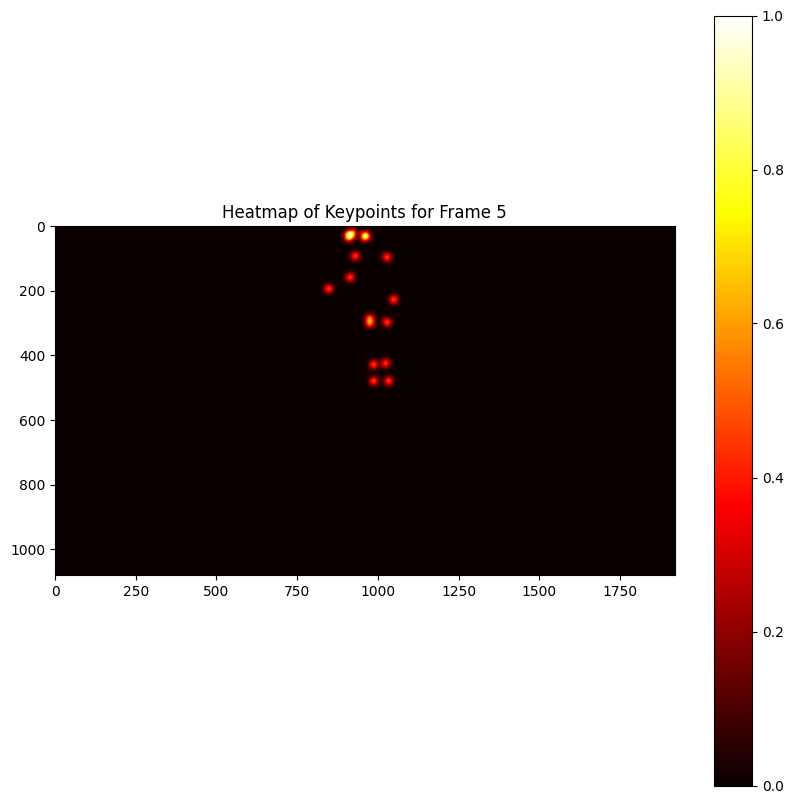

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

frame_index = 4


keypoints = data['keypoint'][0][frame_index]  


heatmap = np.zeros(data['img_shape'][:2])


spread = 10  
for joint in keypoints:
    x, y = int(joint[0]), int(joint[1])  
    if 0 <= x < heatmap.shape[1] and 0 <= y < heatmap.shape[0]:
        heatmap[y, x] = 1  


heatmap_blurred = gaussian_filter(heatmap, sigma=spread)


heatmap_normalized = heatmap_blurred / heatmap_blurred.max()


plt.figure(figsize=(10, 10))
plt.imshow(heatmap_normalized, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title(f'Heatmap of Keypoints for Frame {frame_index + 1}')
plt.show()


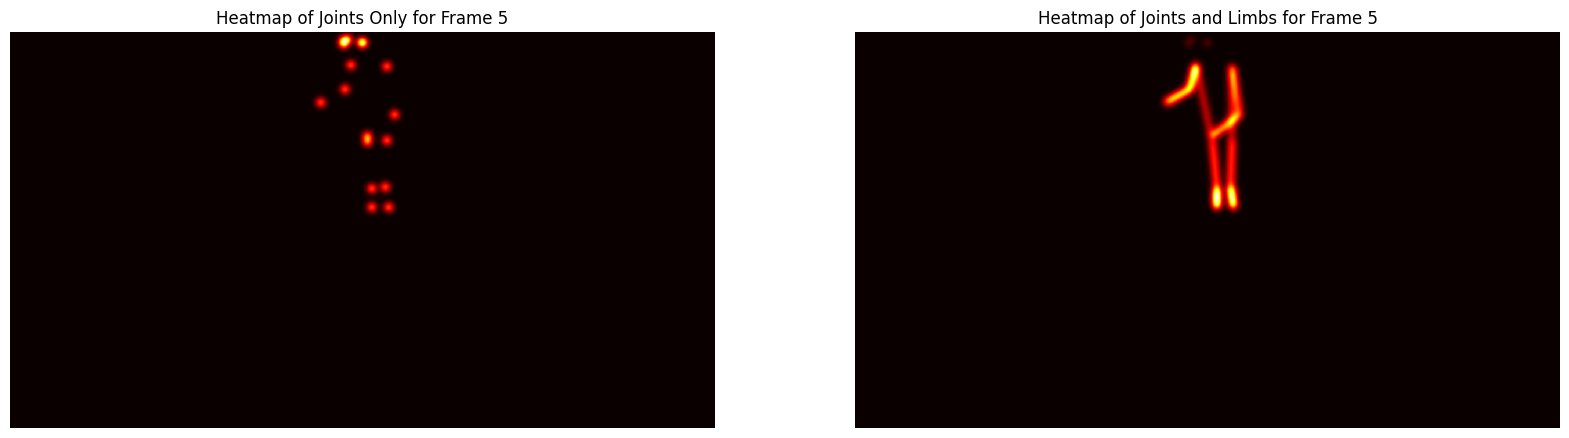

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter


limb_pairs = [
    (5, 7), (7, 9),  # left arm
    (6, 8), (8, 10), # right arm
    (5, 11), (6, 12), # shoulders to hips
    (11, 13), (13, 15), # left leg
    (12, 14), (14, 16)  # right leg
]


keypoints = data['keypoint'][0][frame_index]  

heatmap_joints = np.zeros(data['img_shape'][:2])
heatmap_joints_limbs = np.zeros(data['img_shape'][:2])

spread = 10  
for joint in keypoints:
    x, y = int(joint[0]), int(joint[1]) 
    if 0 <= x < heatmap_joints.shape[1] and 0 <= y < heatmap_joints.shape[0]:
        heatmap_joints[y, x] = 1  
        heatmap_joints_limbs[y, x] = 1  


for pair in limb_pairs:
    joint_start = keypoints[pair[0]]
    joint_end = keypoints[pair[1]]
    np_x = np.linspace(joint_start[0], joint_end[0], num=50, dtype=int)
    np_y = np.linspace(joint_start[1], joint_end[1], num=50, dtype=int)
    heatmap_joints_limbs[np_y, np_x] = 1


heatmap_blurred_joints = gaussian_filter(heatmap_joints, sigma=spread)
heatmap_blurred_joints_limbs = gaussian_filter(heatmap_joints_limbs, sigma=spread)


heatmap_normalized_joints = heatmap_blurred_joints / heatmap_blurred_joints.max()
heatmap_normalized_joints_limbs = heatmap_blurred_joints_limbs / heatmap_blurred_joints_limbs.max()


fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(heatmap_normalized_joints, cmap='hot', interpolation='nearest')
ax[0].set_title('Heatmap of Joints Only for Frame {}'.format(frame_index + 1))
ax[0].axis('off')  

ax[1].imshow(heatmap_normalized_joints_limbs, cmap='hot', interpolation='nearest')
ax[1].set_title('Heatmap of Joints and Limbs for Frame {}'.format(frame_index + 1))
ax[1].axis('off')  
plt.show()


In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import imageio

limb_pairs = [
    (5, 7), (7, 9),  # left arm
    (6, 8), (8, 10), # right arm
    (5, 11), (6, 12), # shoulders to hips
    (11, 13), (13, 15), # left leg
    (12, 14), (14, 16)  # right leg
]

writer_joints = imageio.get_writer('joints_heatmap2.mp4', fps=10)
writer_joints_limbs = imageio.get_writer('joints_limbs_heatmap2.mp4', fps=10)

for frame_index in range(len(data['keypoint'][0])):
    keypoints = data['keypoint'][0][frame_index]


    heatmap_joints = np.zeros(data['img_shape'][:2])
    heatmap_joints_limbs = np.zeros(data['img_shape'][:2])


    spread = 10
    for joint in keypoints:
        x, y = int(joint[0]), int(joint[1])
        if 0 <= x < heatmap_joints.shape[1] and 0 <= y < heatmap_joints.shape[0]:
            heatmap_joints[y, x] = 1
            heatmap_joints_limbs[y, x] = 1


    for pair in limb_pairs:
        joint_start = keypoints[pair[0]]
        joint_end = keypoints[pair[1]]
        np_x = np.linspace(joint_start[0], joint_end[0], num=50, dtype=int)
        np_y = np.linspace(joint_start[1], joint_end[1], num=50, dtype=int)
        heatmap_joints_limbs[np_y, np_x] = 1


    heatmap_blurred_joints = gaussian_filter(heatmap_joints, sigma=spread)
    heatmap_blurred_joints_limbs = gaussian_filter(heatmap_joints_limbs, sigma=spread)


    heatmap_normalized_joints = (heatmap_blurred_joints / heatmap_blurred_joints.max() * 255).astype(np.uint8)
    heatmap_normalized_joints_limbs = (heatmap_blurred_joints_limbs / heatmap_blurred_joints_limbs.max() * 255).astype(np.uint8)


    heatmap_rgb_joints = plt.cm.hot(heatmap_normalized_joints)[:, :, :3]
    heatmap_rgb_joints_limbs = plt.cm.hot(heatmap_normalized_joints_limbs)[:, :, :3]


    writer_joints.append_data((heatmap_rgb_joints * 255).astype(np.uint8))
    writer_joints_limbs.append_data((heatmap_rgb_joints_limbs * 255).astype(np.uint8))

# Close the writers
writer_joints.close()
writer_joints_limbs.close()

print("Videos saved: 'joints_heatmap.mp4' and 'joints_limbs_heatmap.mp4'")


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1920, 1080) to (1920, 1088) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1920, 1080) to (1920, 1088) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Videos saved: 'joints_heatmap.mp4' and 'joints_limbs_heatmap.mp4'


In [66]:
from moviepy.editor import VideoFileClip, clips_array
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import imageio
from PIL import Image
# Load the original video
name = 'sut2A0001'
clip = VideoFileClip(f'{name}.mp4')
fps = clip.fps  # Frame rate of the original video

# Prepare video writer
writer_joints = imageio.get_writer(f'{name}_joints.mp4', fps=fps)
writer_joints_limbs = imageio.get_writer(f'{name}_limbs.mp4', fps=fps)

# Define limb pairs based on COCO keypoints
limb_pairs = [
    (5, 7), (7, 9),  # left arm
    (6, 8), (8, 10), # right arm
    (5, 11), (6, 12), # shoulders to hips
    (11, 13), (13, 15), # left leg
    (12, 14), (14, 16)  # right leg
]

intensity_multiplier = 5  # Increase this factor to boost color intensity

# Process each frame for the video
for i, frame in enumerate(clip.iter_frames()):
    if i >= len(data['keypoint'][0]):
        break
    keypoints = data['keypoint'][0][i]

    # Create two empty canvases based on img_shape
    heatmap_joints = np.zeros(data['img_shape'][:2])
    heatmap_joints_limbs = np.zeros(data['img_shape'][:2])

    # Simulate heat around each joint
    spread = 10
    for joint in keypoints:
        x, y = int(joint[0]), int(joint[1])
        if 0 <= x < heatmap_joints.shape[1] and 0 <= y < heatmap_joints.shape[0]:
            heatmap_joints[y, x] = 1 * intensity_multiplier  # Increase initial heat value
            heatmap_joints_limbs[y, x] = 1 * intensity_multiplier

    # Drawing limbs on the joint+limb heatmap
    for pair in limb_pairs:
        joint_start = keypoints[pair[0]]
        joint_end = keypoints[pair[1]]
        np_x = np.linspace(joint_start[0], joint_end[0], num=50, dtype=int)
        np_y = np.linspace(joint_start[1], joint_end[1], num=50, dtype=int)
        heatmap_joints_limbs[np_y, np_x] += 1 * intensity_multiplier  # Apply increased heat value

    # Apply Gaussian blur
    heatmap_blurred_joints = gaussian_filter(heatmap_joints, sigma=spread)
    heatmap_blurred_joints_limbs = gaussian_filter(heatmap_joints_limbs, sigma=spread)

    # Normalize
    heatmap_normalized_joints = plt.cm.hot(heatmap_blurred_joints / np.max(heatmap_blurred_joints))
    heatmap_normalized_joints_limbs = plt.cm.hot(heatmap_blurred_joints_limbs / np.max(heatmap_blurred_joints_limbs))

    # Prepare original frame (resize if necessary)
    original_frame = frame[:, :, :3]  # Assuming RGB
    original_frame = np.array(Image.fromarray(original_frame).resize(heatmap_normalized_joints.shape[1::-1]))

    # Combine original and heatmap frames
    combined_frame_joints = np.hstack((original_frame, (heatmap_normalized_joints[:, :, :3] * 255).astype(np.uint8)))
    combined_frame_joints_limbs = np.hstack((original_frame, (heatmap_normalized_joints_limbs[:, :, :3] * 255).astype(np.uint8)))

    # Write to video
    writer_joints.append_data(combined_frame_joints)
    writer_joints_limbs.append_data(combined_frame_joints_limbs)

# Close the writers and video file
writer_joints.close()
writer_joints_limbs.close()
clip.close()

print(f"Videos saved: {name}_joints.mp4 and {name}_joints_limbs2.mp4'")


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (3840, 1080) to (3840, 1088) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (3840, 1080) to (3840, 1088) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Videos saved: sut2A0001_joints.mp4 and sut2A0001_joints_limbs2.mp4'
